In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
data.shape

(5110, 12)

In [6]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
data.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [12]:
data_cat = data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [13]:
for i in data_cat.columns:
   print(data_cat[i].unique()) 

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [14]:
for i in data_cat.columns:
    print(data_cat[i].value_counts())

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


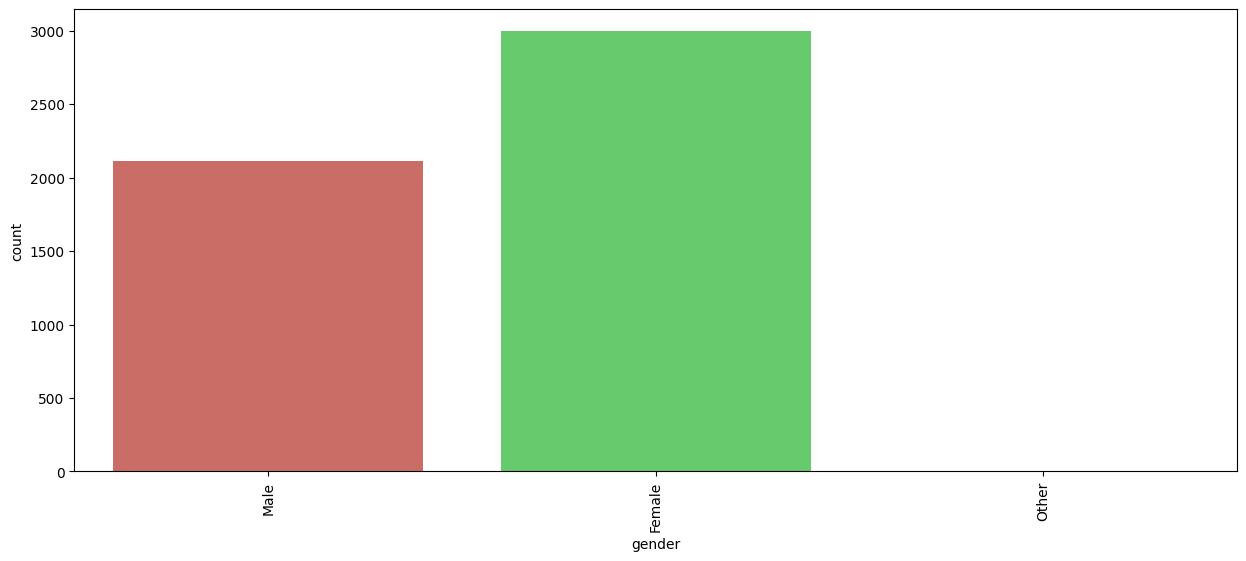

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


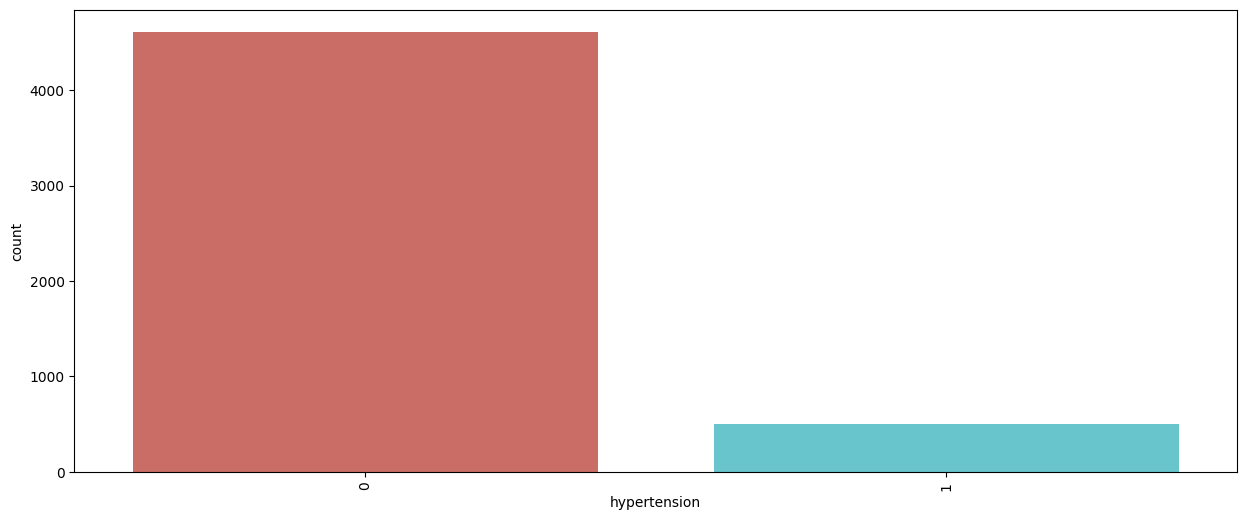

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


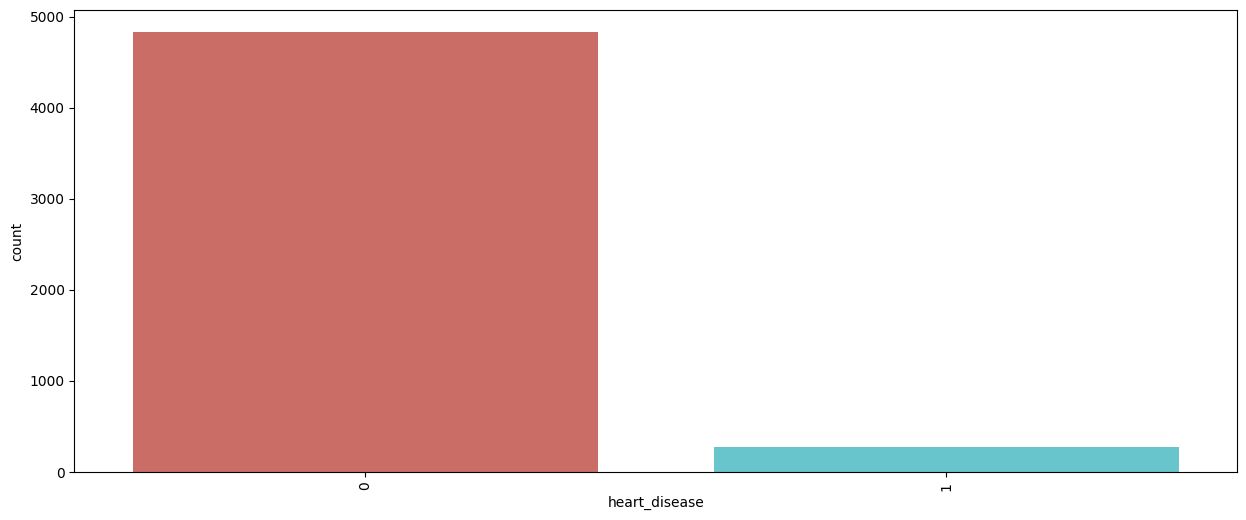

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


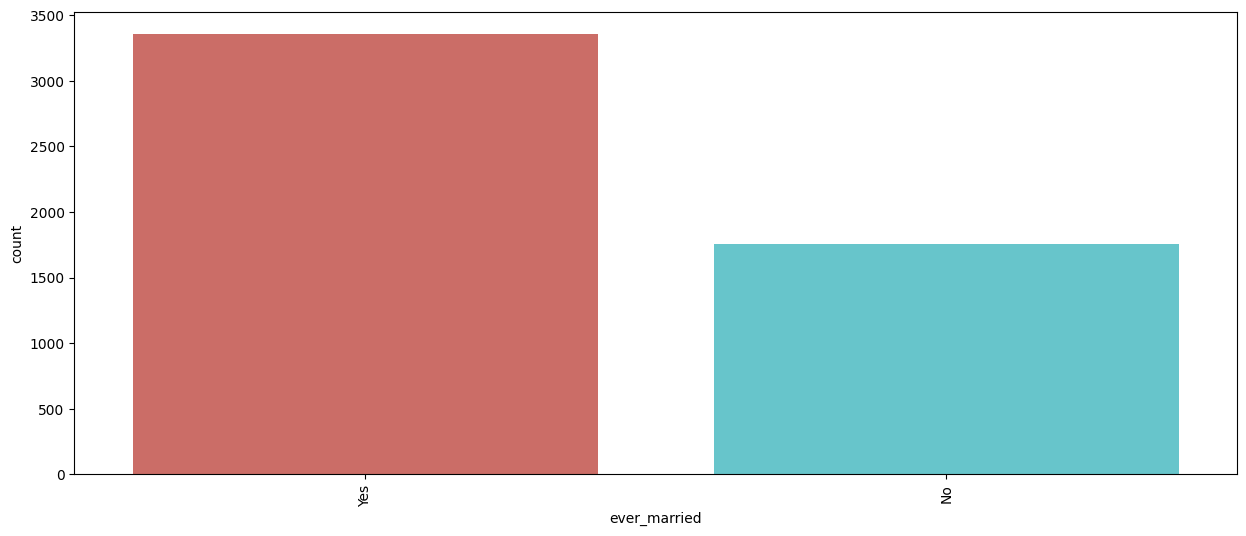

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


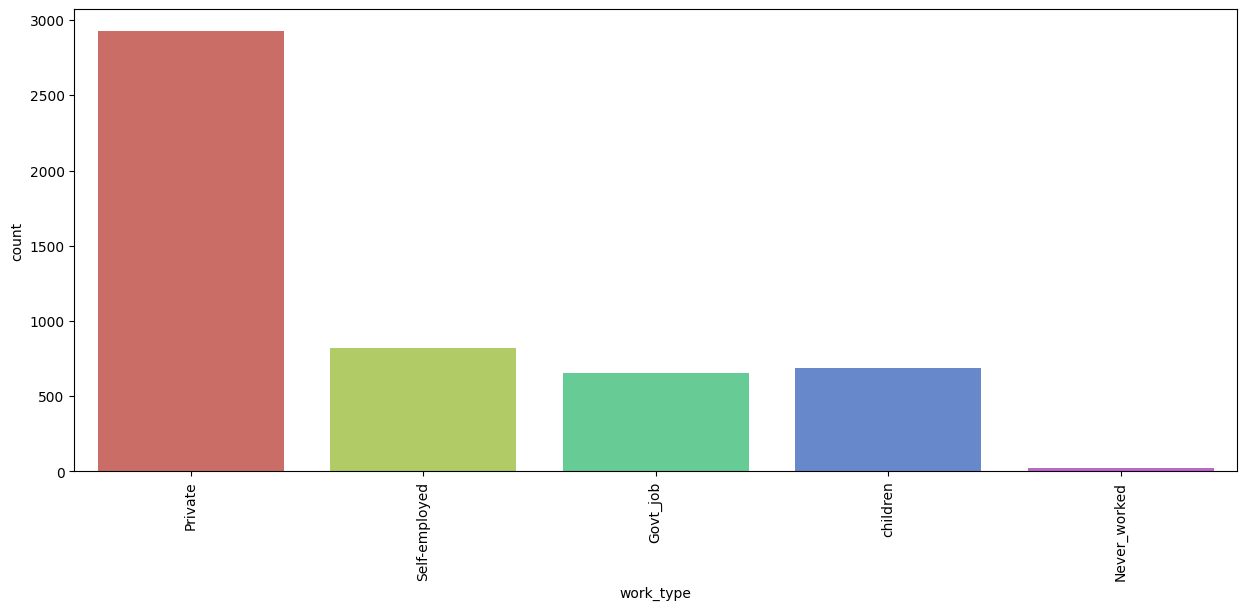

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


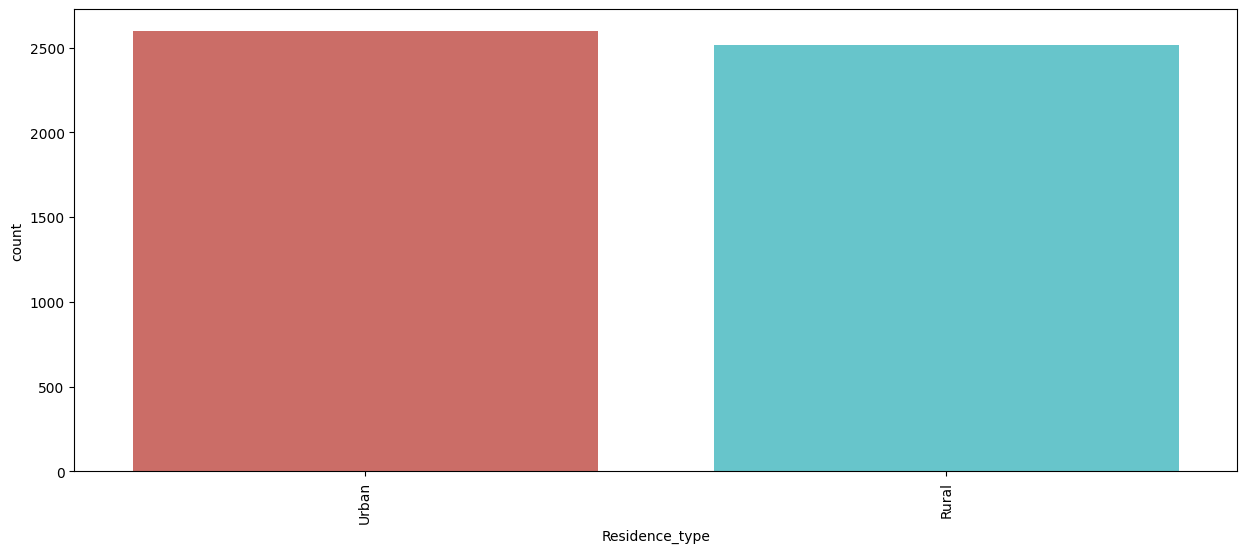

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


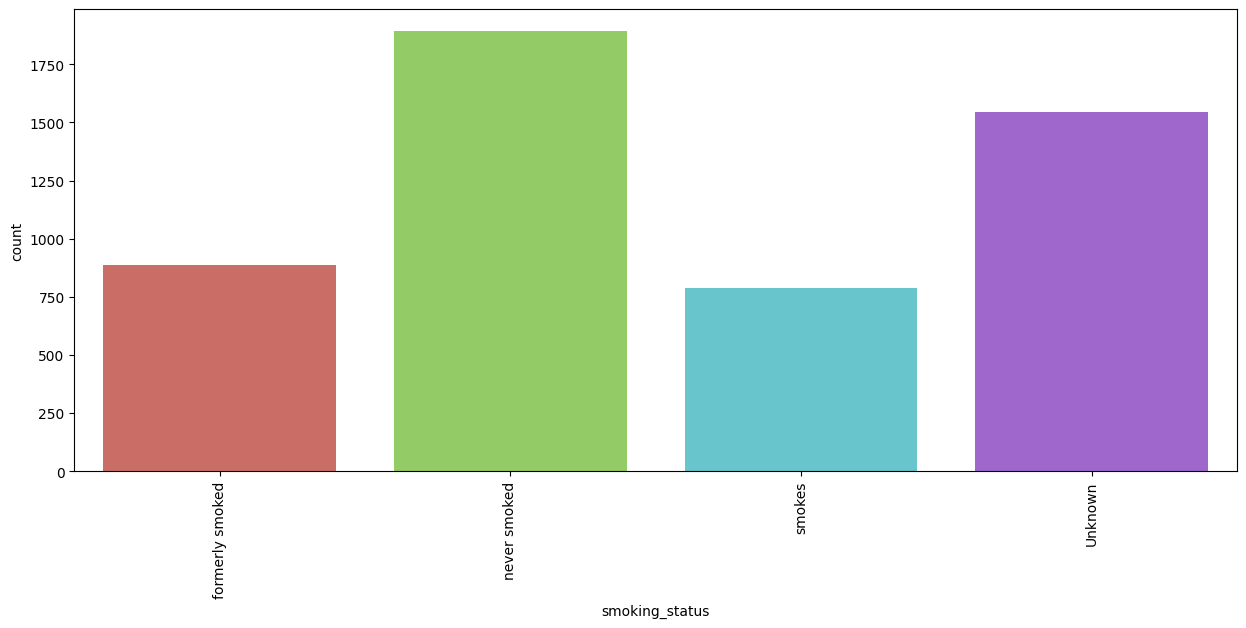

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\3203254345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`


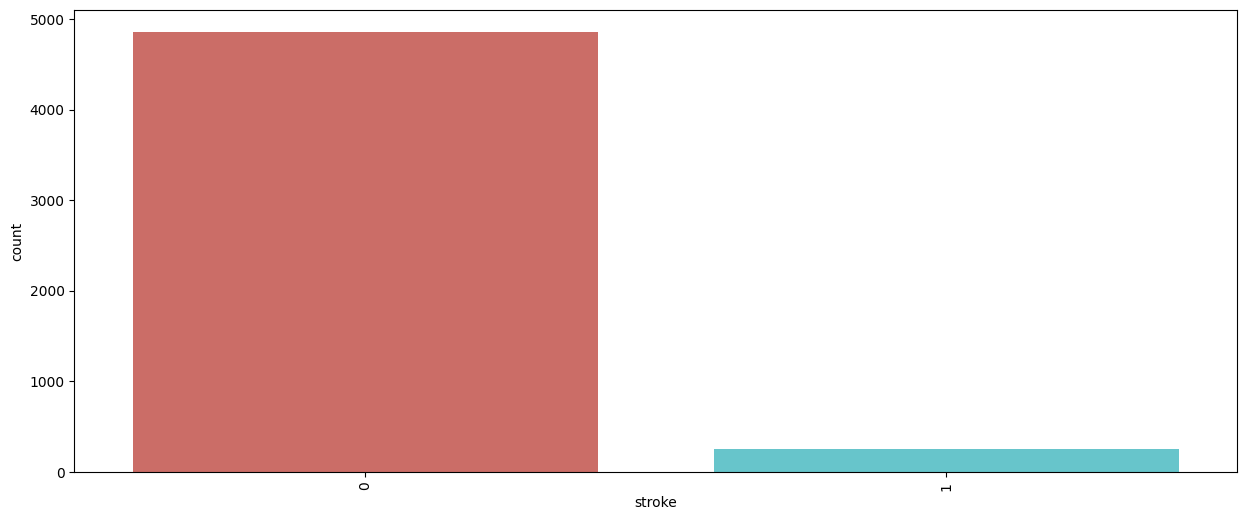

In [15]:
for i in data_cat.columns:
    plt.figure(figsize=(15,6))
    sns.countplot(x=i, data=data_cat, palette='hls')  # Specify `x` instead of passing `data[i]`
    plt.xticks(rotation=90)
    plt.show()


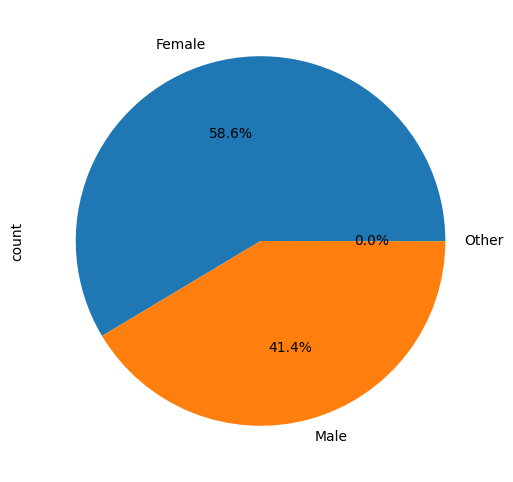

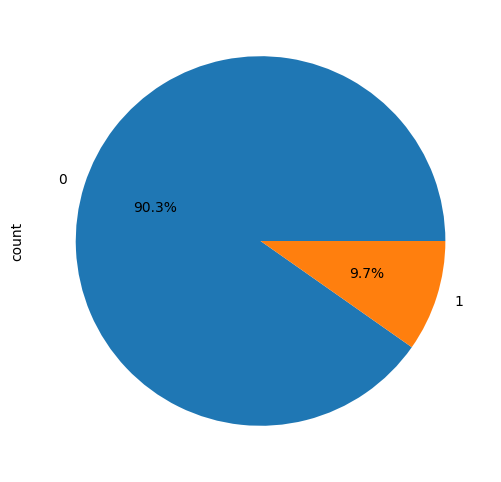

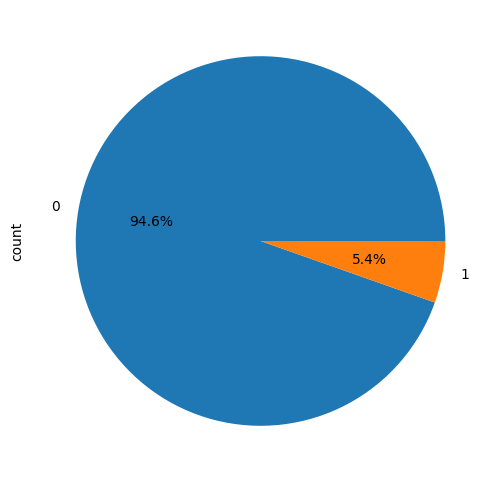

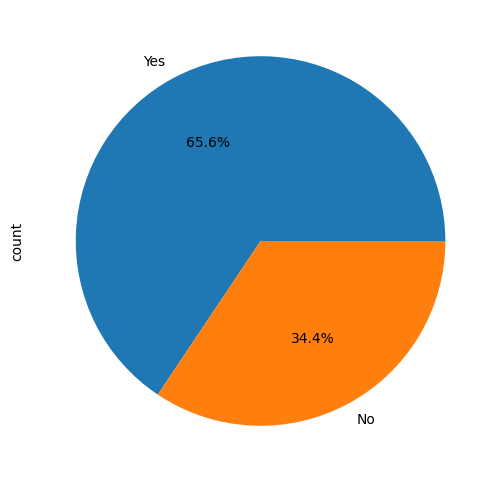

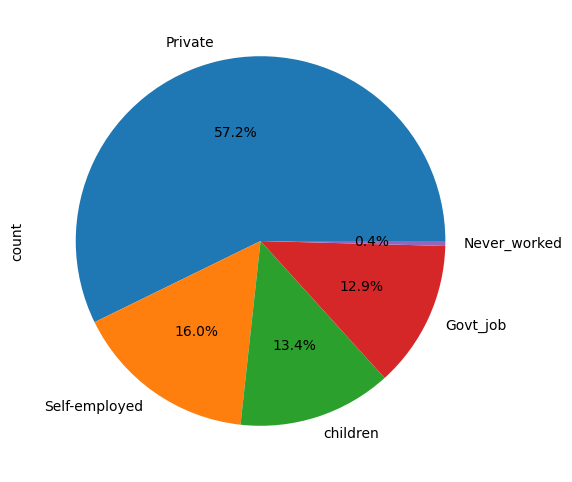

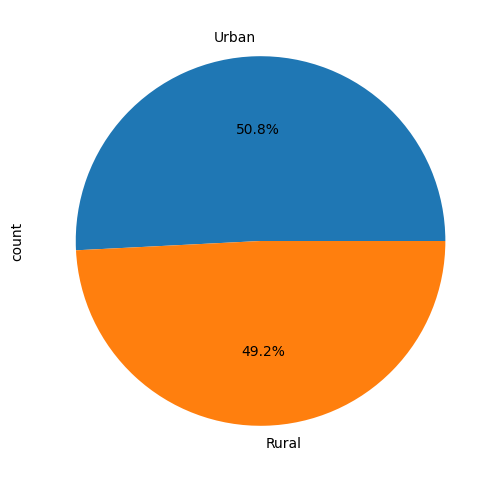

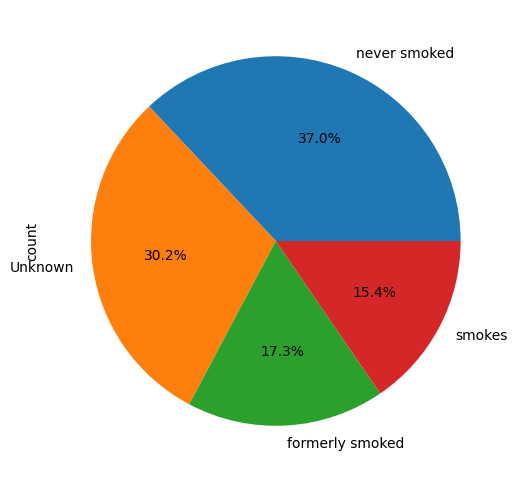

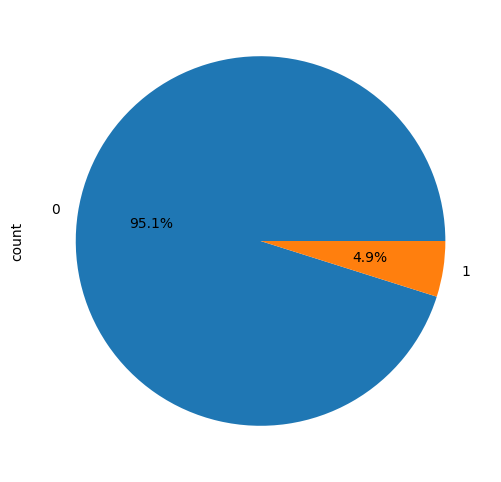

In [16]:
for i in data_cat.columns:
    plt.figure(figsize = (15,6))
    data_cat[i].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
    plt.xticks(rotation = 90)
    plt.show()

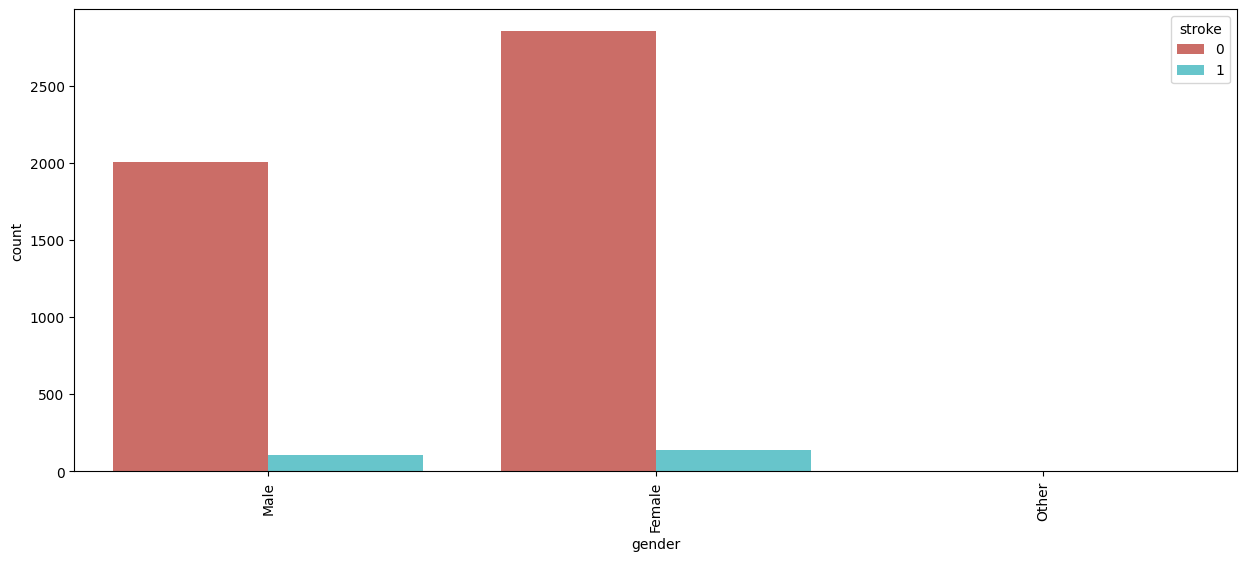

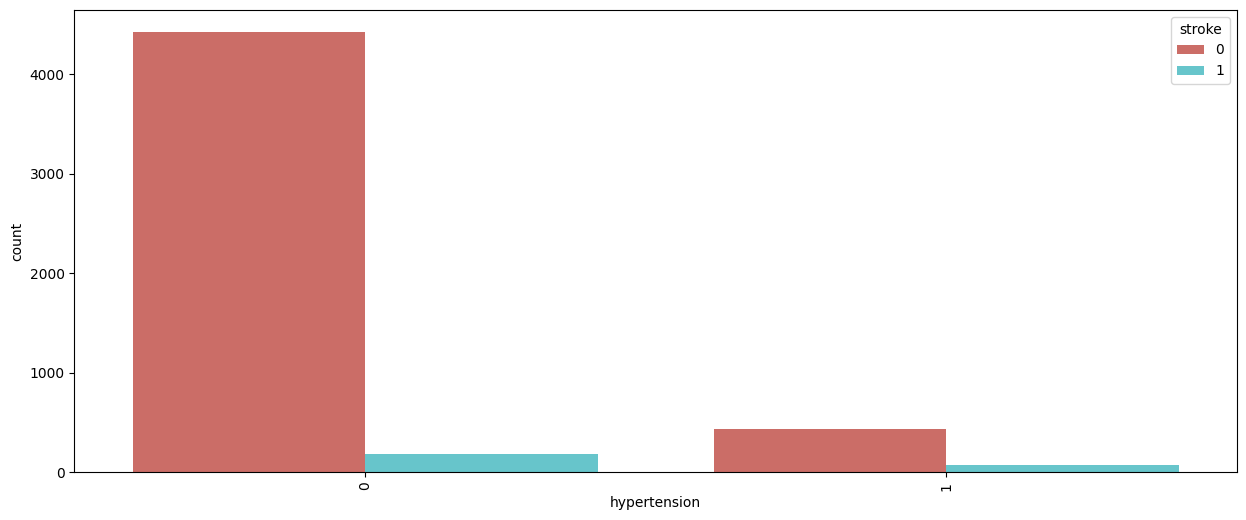

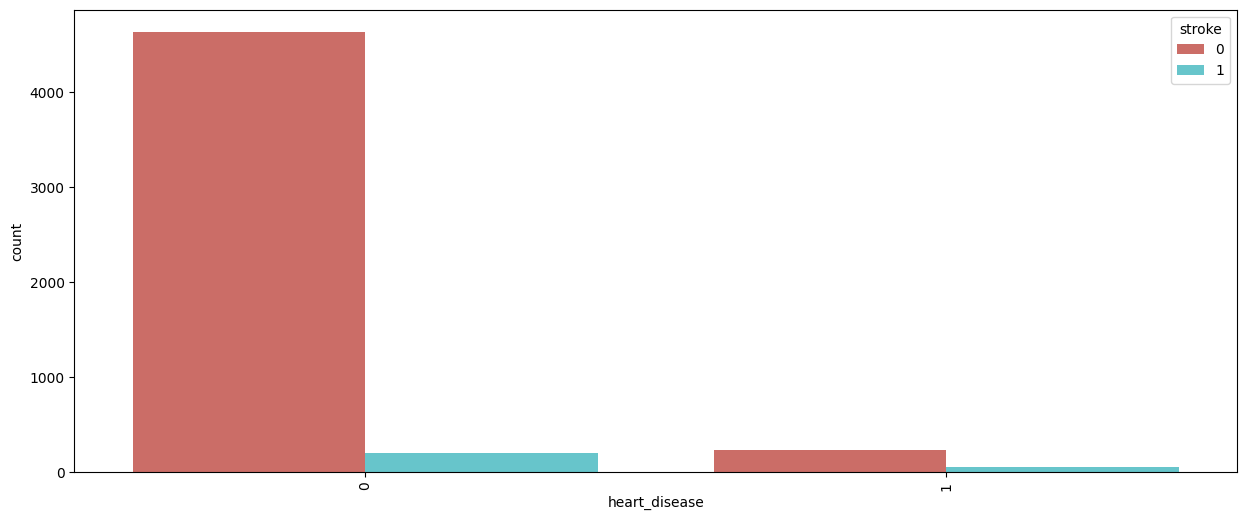

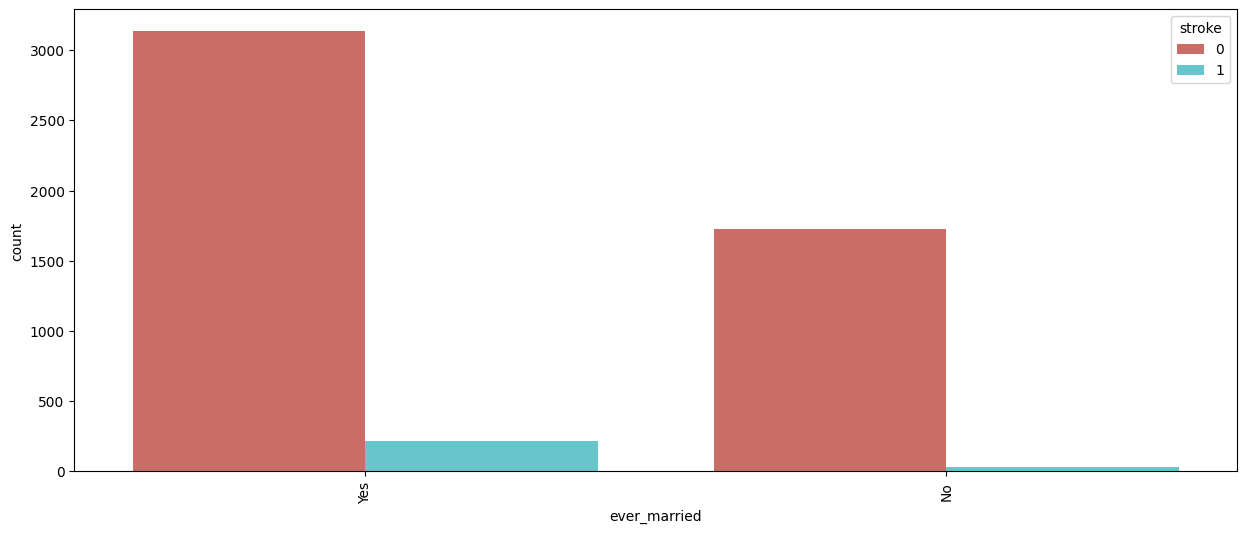

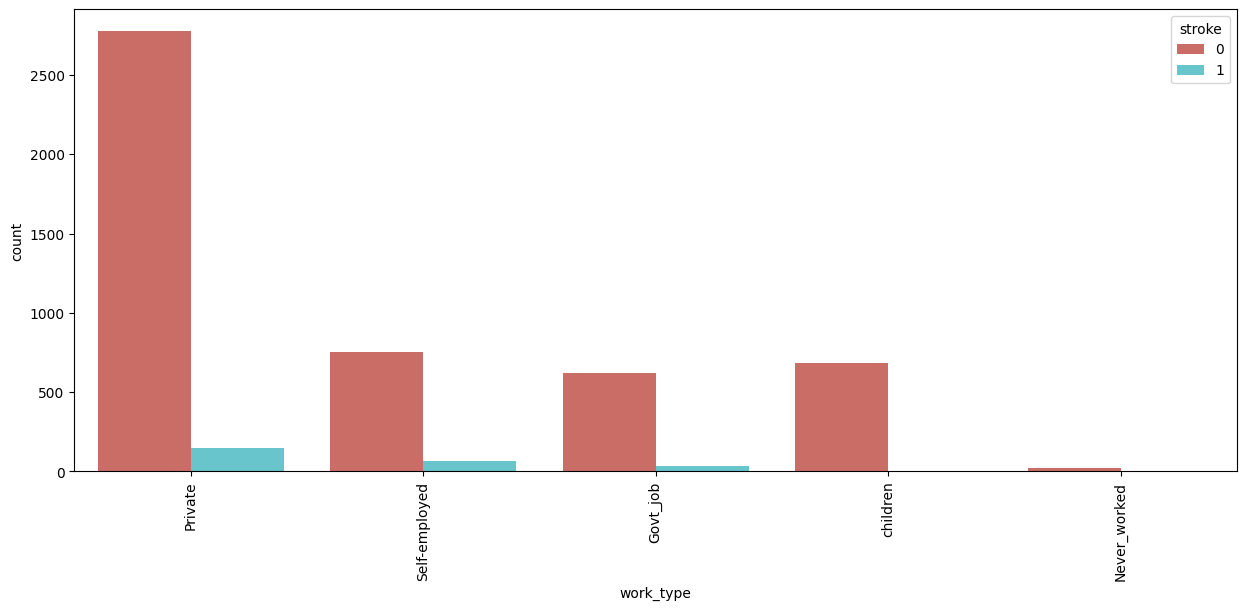

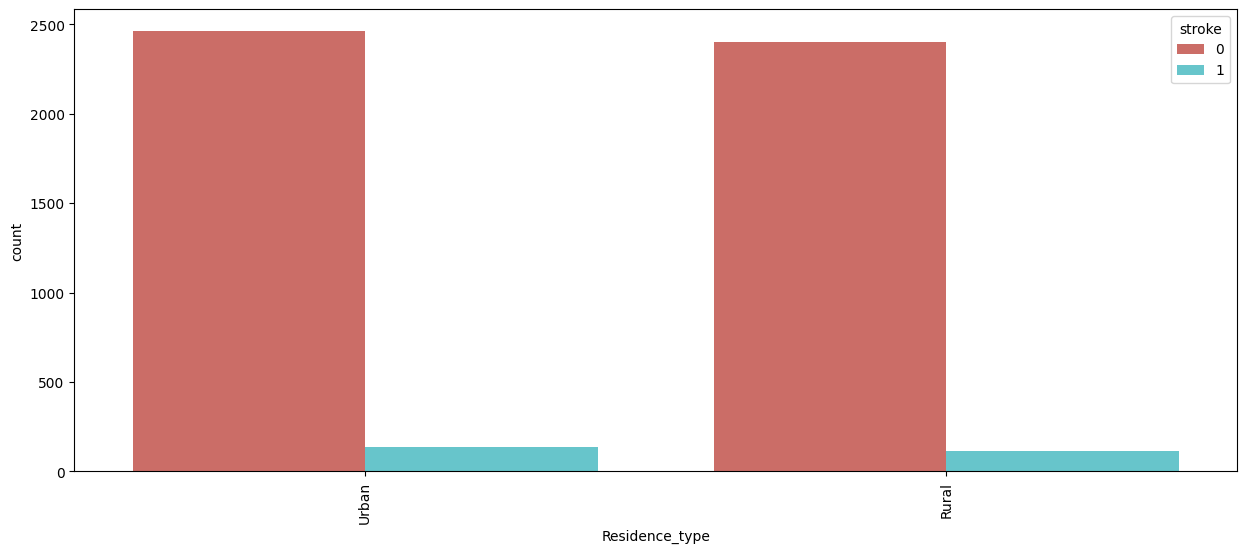

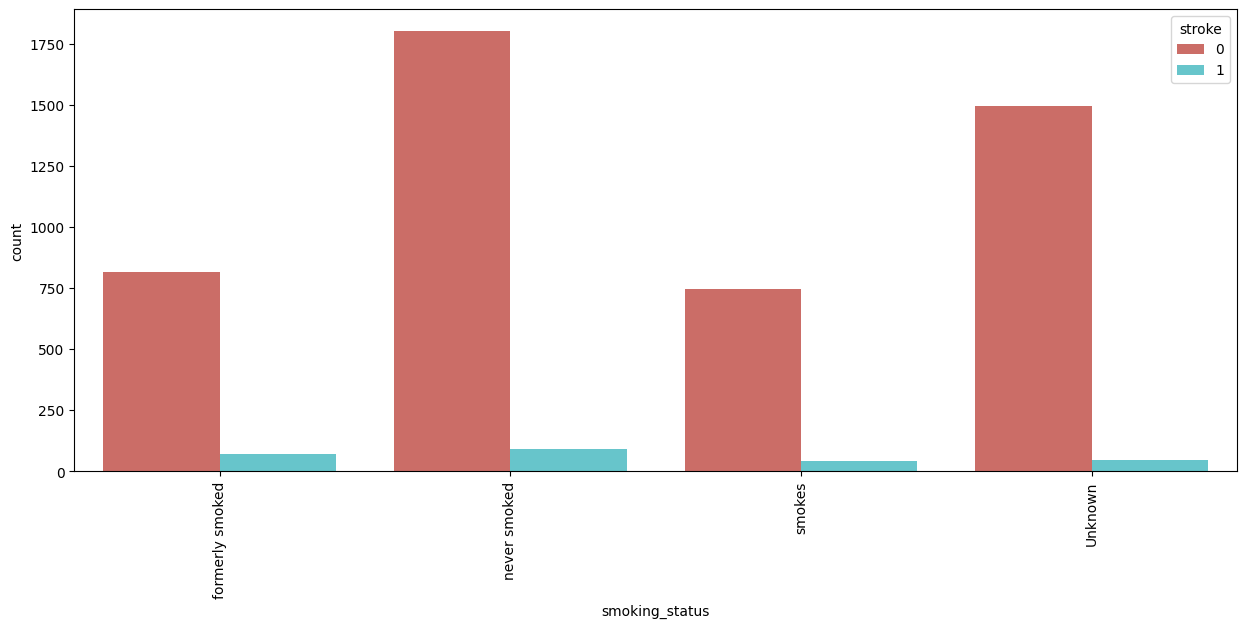

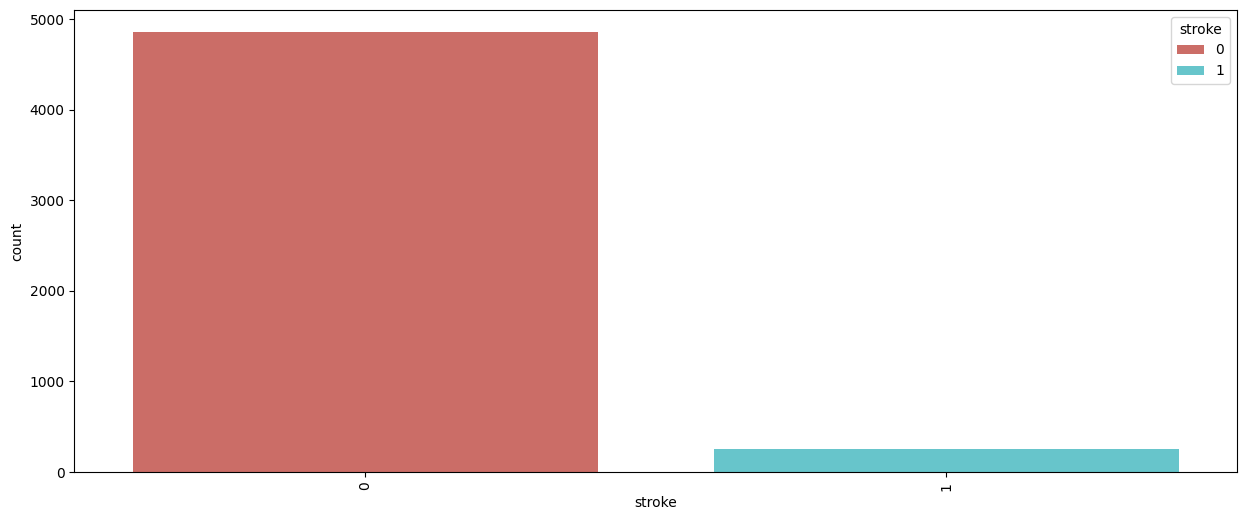

In [17]:
for i in data_cat.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=data_cat, hue='stroke', palette='hls')  # Use x=i
    plt.xticks(rotation=90)
    plt.show()


In [18]:

# Group data by 'gender' and sum the 'stroke' values
gender = data.groupby('gender')['stroke'].sum()

# Create a DataFrame with 'labels' and 'values' for the pie chart
data_gender = pd.DataFrame({
    'labels': gender.index,
    'values': gender.values
})

# Define colors for the pie chart
colors = ['lightpink', 'lightskyblue']

# Create a pie chart using Plotly directly
fig = go.Figure(data=[go.Pie(labels=data_gender['labels'], 
                             values=data_gender['values'],
                             marker_colors=colors)])

fig.update_layout(title='The Proportion of Stroke among Gender')
fig.show()


In [19]:

# Group data by 'work_type' and sum the 'stroke' values
job = data.groupby('work_type')['stroke'].sum()

# Create a DataFrame with 'labels' and 'values' for the pie chart
data_job = pd.DataFrame({
    'labels': job.index,
    'values': job.values
})

# Define colors for the pie chart
colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']

# Create a pie chart using Plotly directly
fig = go.Figure(data=[go.Pie(
    labels=data_job['labels'],
    values=data_job['values'],
    marker_colors=colors2,
    pull=[0.1, 0.1, 0.1, 0.2]  # Customize the pull of slices
)])

fig.update_layout(title='Work Type of People Who Had Stroke')
fig.show()


In [20]:


# Group data by 'smoking_status' and sum the 'stroke' values
smoke = data.groupby('smoking_status')['stroke'].sum()

# Create a DataFrame with 'labels' and 'values' for the pie chart
data_smoke = pd.DataFrame({
    'labels': smoke.index,
    'values': smoke.values
})

# Define colors for the pie chart
colors2 = ['palegreen', 'paleturquoise', 'thistle', 'moccasin']

# Create a pie chart using Plotly directly
fig = go.Figure(data=[go.Pie(
    labels=data_smoke['labels'],
    values=data_smoke['values'],
    marker_colors=colors2,
    pull=[0.02, 0.02, 0.1, 0.02]  # Customize the pull of slices
)])

fig.update_layout(title='Smoking Status of People Who Had Stroke')
fig.show()


In [21]:


# Group data by 'Residence_type' and sum the 'stroke' values
Residence = data.groupby('Residence_type')['stroke'].sum()

# Create a DataFrame with 'labels' and 'values' for the pie chart
data_Residence = pd.DataFrame({
    'labels': Residence.index,
    'values': Residence.values
})

# Define colors for the pie chart
colors2 = ['palegreen', 'paleturquoise']

# Create a donut chart using Plotly directly
fig = go.Figure(data=[go.Pie(
    labels=data_Residence['labels'],
    values=data_Residence['values'],
    marker_colors=colors2,
    pull=[0.02, 0.02],  # Customize the pull of slices
    hole=0.3  # Creates a donut chart
)])

fig.update_layout(title='Residence Area of People Who Had Stroke')
fig.show()


In [22]:


# Group data by 'ever_married' and sum the 'stroke' values
Married = data.groupby('ever_married')['stroke'].sum()

# Create a DataFrame with 'labels' and 'values' for the pie chart
data_Married = pd.DataFrame({
    'labels': Married.index,
    'values': Married.values
})

# Define colors for the pie chart
colors2 = ['palegreen', 'paleturquoise']  # Adjust colors as needed

# Create a donut chart using Plotly directly
fig = go.Figure(data=[go.Pie(
    labels=data_Married['labels'],
    values=data_Married['values'],
    marker_colors=colors2,
    pull=[0.02, 0.02],  # Customize the pull of slices
    hole=0.3  # Creates a donut chart
)])

fig.update_layout(title='Marriage Status of People Who Had Stroke')
fig.show()


In [23]:
data_num = data[['age', 'avg_glucose_level', 'bmi']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\2471734859.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



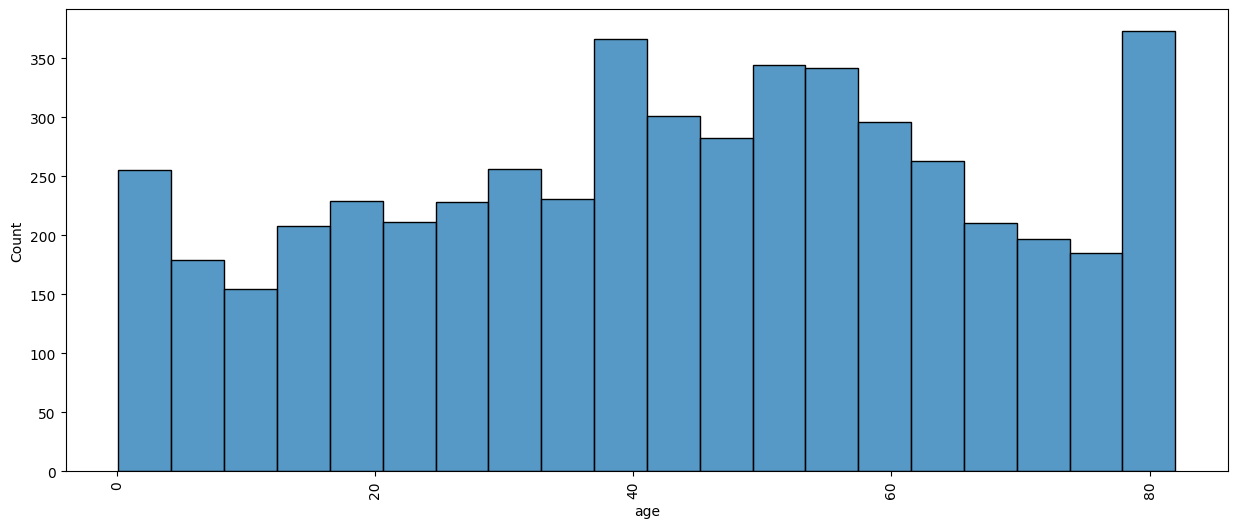

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\2471734859.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



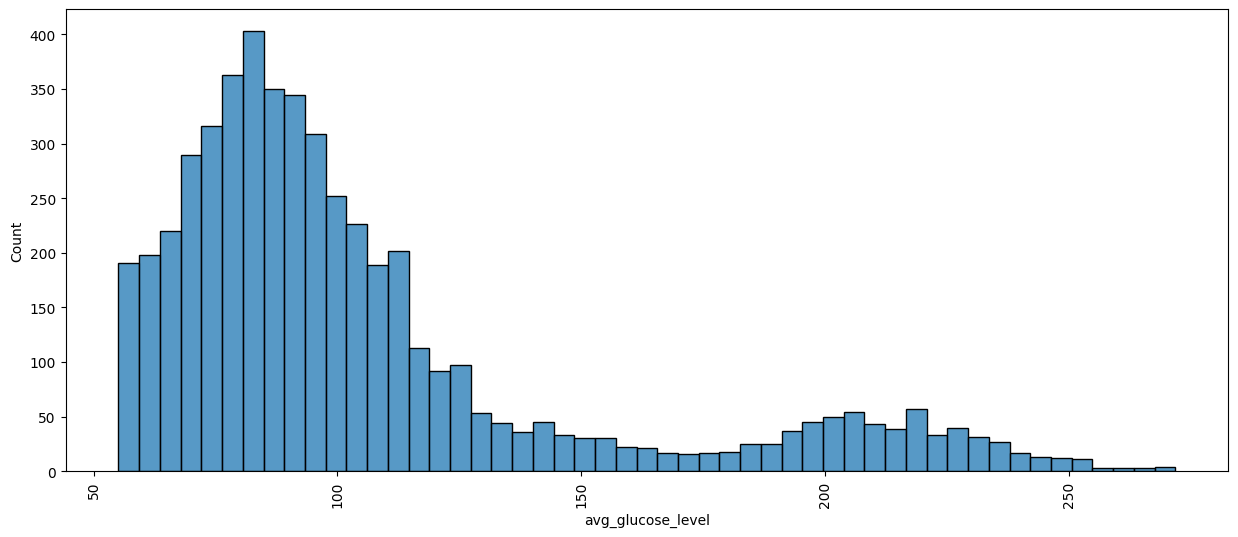

C:\Users\Admin\AppData\Local\Temp\ipykernel_14004\2471734859.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



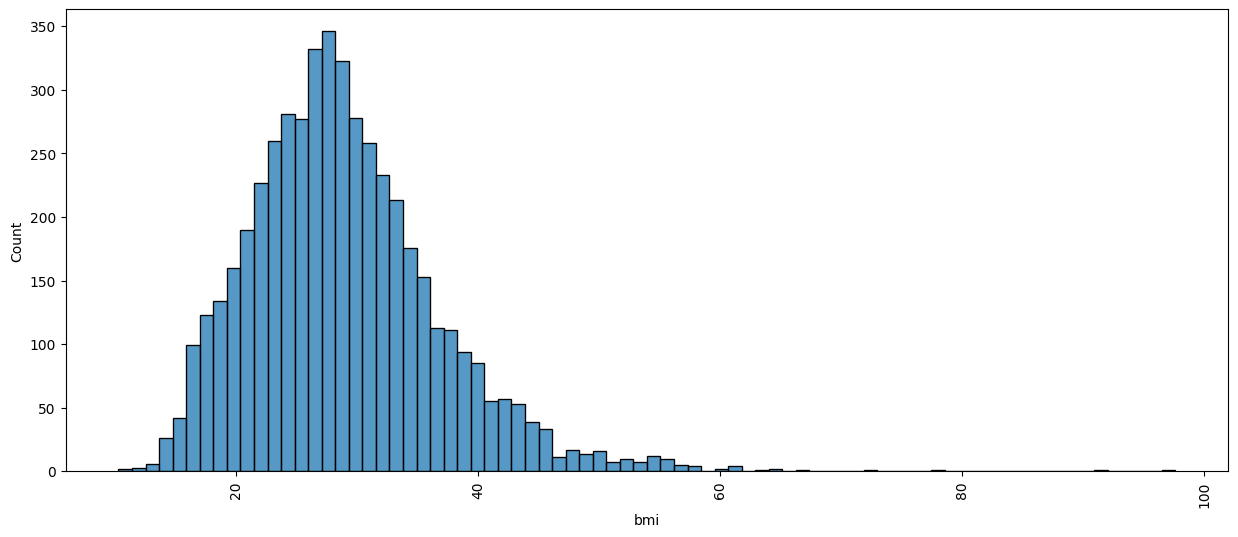

In [24]:
for i in data_num.columns:
    plt.figure(figsize = (15,6))
    sns.histplot(data_num[i], palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

In [25]:


# Filter data where stroke == 1 and reset the index
stroke = data.loc[data['stroke'] == 1].reset_index()

# Create two new columns for male and female ages
stroke["male_age"] = stroke[stroke["gender"] == "Male"]["age"]
stroke["female_age"] = stroke[stroke["gender"] == "Female"]["age"]

# Create the histogram plot using Plotly
fig = go.Figure()

# Add Male Age histogram
fig.add_trace(go.Histogram(
    x=stroke['male_age'].dropna(),  # Remove NaN values
    name='Male Ages',  # Label for the legend
    marker_color='blue',  # Color of the bars
    opacity=0.75,
    nbinsx=20  # Number of bins
))

# Add Female Age histogram
fig.add_trace(go.Histogram(
    x=stroke['female_age'].dropna(),  # Remove NaN values
    name='Female Ages',  # Label for the legend
    marker_color='pink',  # Color of the bars
    opacity=0.75,
    nbinsx=20  # Number of bins
))

# Update layout for title, axes, and theme
fig.update_layout(
    title='Stroke Ages by Gender',
    xaxis_title='Ages',
    yaxis_title='Count',
    barmode='overlay',  # To overlay both histograms
    template='plotly_white'  # White background theme
)

# Show the plot
fig.show()


In [26]:
data['ever_married'] = [ 0 if i !='Yes' else 1 for i in data['ever_married'] ]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

In [27]:
# ever_married --1 for 'Yes' and 0 for 'No'
# gender -- 1 for 'Female' and 0 for 'Male'

In [28]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type','smoking_status'])

In [30]:
data = pd.get_dummies(data, columns = ['work_type'])

KeyError: "None of [Index(['work_type'], dtype='object')] are in the [columns]"

In [31]:
data

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,228.69,36.6,1,False,False,True,False,False,False,True,False,True,False,False
1,51676,1,61.0,0,0,1,202.21,NaN,1,False,False,False,True,False,True,False,False,False,True,False
2,31112,0,80.0,0,1,1,105.92,32.5,1,False,False,True,False,False,True,False,False,False,True,False
3,60182,1,49.0,0,0,1,171.23,34.4,1,False,False,True,False,False,False,True,False,False,False,True
4,1665,1,79.0,1,0,1,174.12,24.0,1,False,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,83.75,NaN,0,False,False,True,False,False,False,True,False,False,True,False
5106,44873,1,81.0,0,0,1,125.20,40.0,0,False,False,False,True,False,False,True,False,False,True,False
5107,19723,1,35.0,0,0,1,82.99,30.6,0,False,False,False,True,False,True,False,False,False,True,False
5108,37544,0,51.0,0,0,1,166.29,25.6,0,False,False,True,False,False,True,False,False,True,False,False


In [31]:
data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2668,43039,1,63.0,0,0,1,153.60,28.0,0,False,False,True,False,False,True,False,False,True,False,False
415,51983,1,33.0,0,0,1,71.16,46.5,0,False,False,True,False,False,True,False,False,False,False,True
1985,34133,1,20.0,0,0,0,93.74,23.7,0,False,False,True,False,False,True,False,True,False,False,False
1747,33906,0,51.0,0,0,1,92.32,34.7,0,True,False,False,False,False,False,True,False,False,False,True
3114,67032,0,42.0,0,0,0,115.21,28.7,0,True,False,False,False,False,False,True,True,False,False,False
438,67177,0,53.0,0,0,1,116.66,28.5,0,False,False,True,False,False,True,False,False,True,False,False
2229,64895,0,54.0,1,0,1,104.42,37.6,0,False,False,False,True,False,True,False,False,False,False,True
3324,46854,1,9.0,0,0,0,82.64,14.5,0,False,False,False,False,True,False,True,True,False,False,False
1543,49023,0,61.0,1,0,1,102.54,40.5,0,False,False,False,True,False,True,False,False,False,True,False
4316,24421,0,30.0,0,0,0,113.08,41.8,0,False,False,True,False,False,False,True,True,False,False,False


In [36]:
data  = pd.get_dummies(data["work_type"],dtype=int)

KeyError: 'work_type'